---

# Kernels

---

## Gaussian

We demonstrate how to use gaussian kernels.

### Imports

Modules defined by us. 

In [1]:
import convolution.kernel 
from domain import equispaced_points

Third party modules.

In [2]:
import matplotlib.pyplot as plt

### Constructions

Construct a domain of 513 equally spaced points centered about the origin. 

In [3]:
t = equispaced_points(512)

Construct a gaussian kernel with mean zero and standard deviation of 30 pixels. 

In [4]:
kernel = convolution.kernel.Gaussian(
    domain=t, standard_deviation=30
)

### Attributes and Properties

We can access the attributes of the kernel as we have defined it. 

In [5]:
print(f'mean = {kernel.mean}')
print(f'standard deviation = {kernel.std}')

mean = 0
standard deviation = 30


We can also access some properties of the kernel. Because the kernel is supposed to be used to model applications involving blur, it is necessary that the sum of the kernel is unity. Therefore each kernel has a normalization constant. 

The normalization constant of this particular instance.

In [6]:
print(f'normalalization constant = {kernel.normalization_constant}')

normalalization constant = 0.01329807601338109


The parameters of the gaussian kernel are the normalization constant, mean, and standard deviation.

In [7]:
print(f'parameters = {kernel.parameter}')

parameters = (0.01329807601338109, 0, 30)


Each gaussian kernel also has partial derivaties that correspond to the mean and standard deviation. 

In [8]:
print(f'number of derivatives: {len(kernel.partial_derivatives)}')

number of derivatives: 1


## Visualizations

Visualize the kernel.

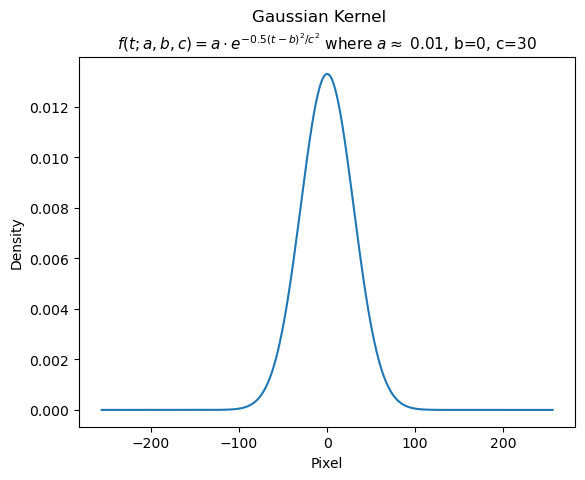

In [9]:
a, b, c = kernel.parameter; plt.suptitle('Gaussian Kernel'); 
plt.plot(t, kernel.image); plt.xlabel('Pixel'); plt.ylabel('Density');
plt.title(r'$f(t; a, b, c) = a\cdot e^{-0.5(t-b)^2 / c^2}$ where ' + 
    r'$a\approx$ ' + f'{a:0.1}, ' + f'b={b}, ' + f'c={c}', fontsize=11); 

Visualize the partial derivative with respect to the mean. 

Text(0, 0.5, 'Intensity per Pixel')

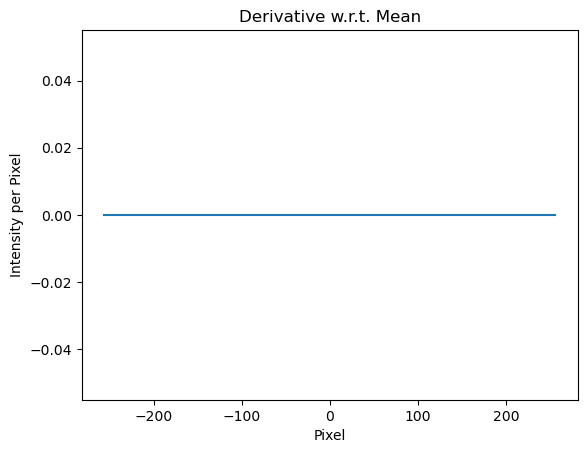

In [10]:
plt.title('Derivative w.r.t. Mean');
plt.plot(t, kernel.derivative_wrt_mean);
plt.xlabel('Pixel'); 
plt.ylabel('Intensity per Pixel')

Visualize the derivative with respect to the standard deviation.

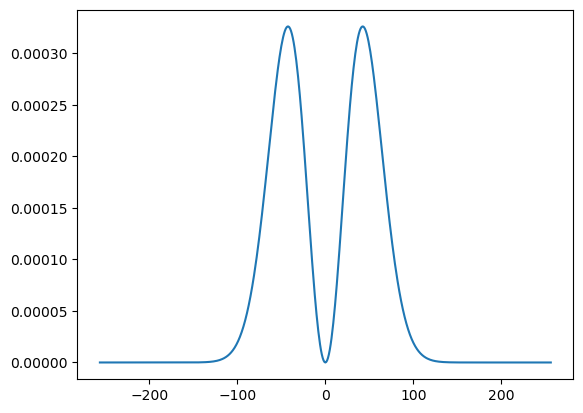

In [11]:
plt.plot(t, kernel.derivative_wrt_std);

---

## Mixture of Gaussians

We can also create a mixture of gaussian kernels. 

In [12]:
g1 = convolution.kernel.Gaussian(t, mean=-50, standard_deviation=30)
g2 = convolution.kernel.Gaussian(t, mean=0, standard_deviation=30)
g3 = convolution.kernel.Gaussian(t, mean=50, standard_deviation=30)

We set the weights to be equal to one. 

In [13]:
w1 = w2 = w3 = 1/3

Constructing the mixture.

In [14]:
kernel_mixture = convolution.kernel.Mixture(
    weights=[w1, w2, w3], 
    kernels=[g1, g2, g3]
)

Visualizing the kernel mixture. 

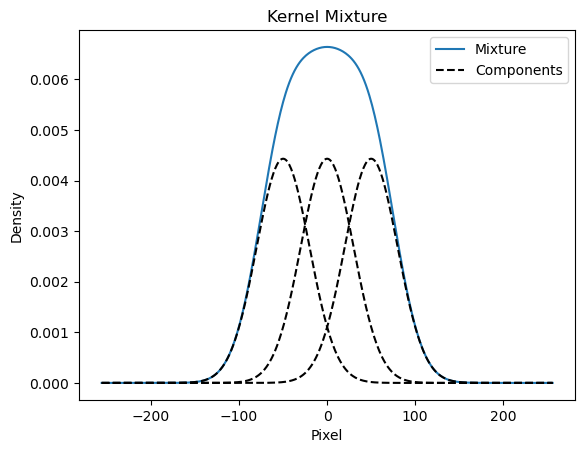

In [15]:
plt.title('Kernel Mixture'); 
plt.plot(t, kernel_mixture.image, label='Mixture'); 
plt.plot(t, w1 * g1.image, 'k--', label='Components');
plt.plot(t, w2 * g2.image, 'k--', t, w3 * g3.image, 'k--');
plt.legend(); plt.xlabel('Pixel'); plt.ylabel('Density');

---

# The End

In [17]:
!jupyter nbconvert kernel-example.ipynb --to slides --post serve

[NbConvertApp] Converting notebook kernel-example.ipynb to slides
[NbConvertApp] Writing 758067 bytes to kernel-example.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/kernel-example.slides.html
Use Control-C to stop this server
^C

Interrupted
